# Boston Housing (linear regression)-keras  

In [6]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
import tensorflow as tf

In [7]:
boston_data=pd.read_csv("F:/Boston.csv")

In [8]:
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


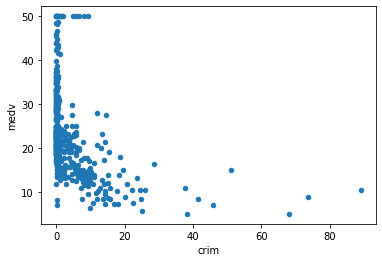

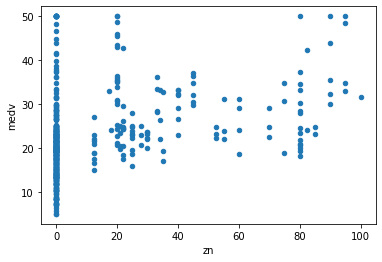

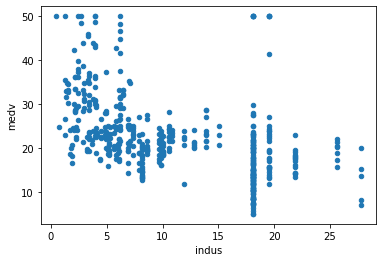

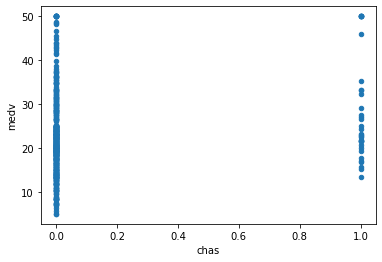

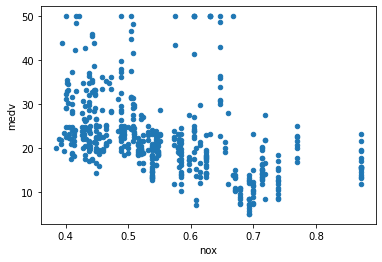

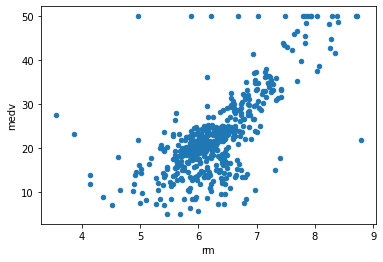

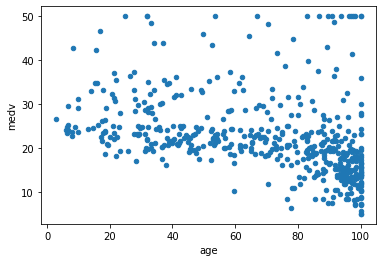

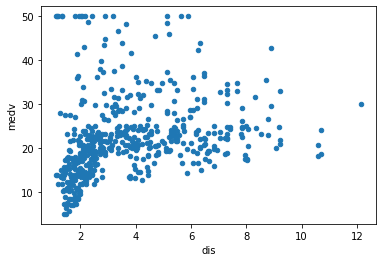

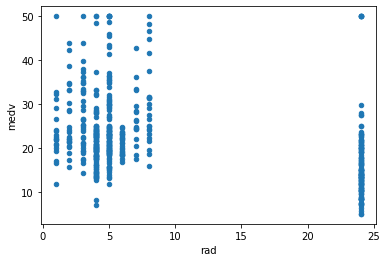

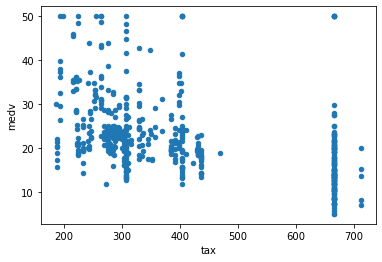

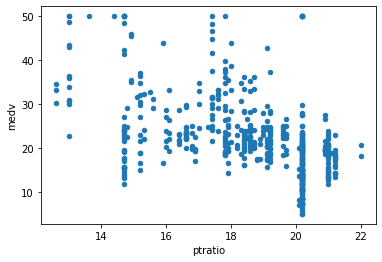

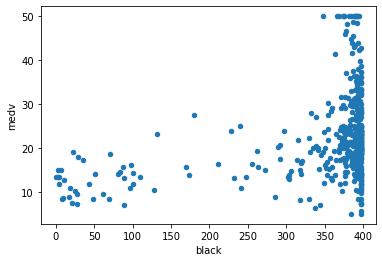

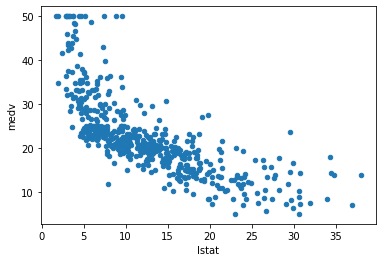

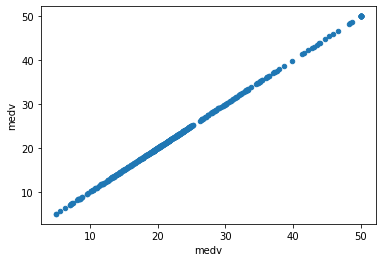

In [9]:
for i in boston_data.columns: 
    boston_data.plot.scatter(x=i,y='medv')

In [10]:
X=boston_data.drop('medv',axis=1)
Y=boston_data.medv

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [12]:
features=X.shape[1]

In [13]:
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(features,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

In [14]:
optimizer=tf.keras.optimizers.RMSprop(0.01)

In [15]:
model.compile(loss='mean_squared_error',optimizer=optimizer)

In [16]:
seed_value=42
seed(seed_value)
import os
os.environ['PTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
np.random.seed(seed_value)

In [17]:
tensorflow.random.set_seed(seed_value)
model.fit(X_train,Y_train,epochs=1000,batch_size=20,verbose=0)

NameError: name 'tensorflow' is not defined

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
Y_pred=model.predict(X_test)
z=np.array(Y_test)
for i in range(152):
    print(Y_pred[i],",",z[i])

In [ ]:
plt.plot(X_test,Y_test, 'g^', X_test,Y_pred, 'r*')
plt.show

automating the hyperparameter tuning with keras

In [21]:
!pip install -q -U keras-tuner
import kerastuner as kt
def model_builder(hp):
    model=Sequential()
    model.add(Dense(10,activation='relu',input_shape=(features,)))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1))
    hp_learning_rate=hp.Choice('learning_rate',values=[1e-1,1e-2,1e-3,1e-4])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate)
    model.compile(loss='mse',metrics=['mse'],optimizer=optimizer)
    return model
tuner_rs=kt.RandomSearch(model_builder,objective="mse",seed=42,max_trials=5,directory='random_search')
tuner_rs.search(X_train,Y_train,epochs=10,validation_split=0.2,verbose=1)

INFO:tensorflow:Reloading Oracle from existing project random_search\untitled_project\oracle.json
Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 1387.5100 - mse: 1387.510 - 1s 97ms/step - loss: 24913.9102 - mse: 24913.9102 - val_loss: 204.4415 - val_mse: 204.4415
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 176.4897 - mse: 176.489 - 0s 29ms/step - loss: 190.0985 - mse: 190.0985 - val_loss: 152.4551 - val_mse: 152.4551
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 62.1827 - mse: 62.182 - 0s 31ms/step - loss: 145.1368 - mse: 145.1368 - val_loss: 121.7097 - val_mse: 121.7097
Epoch 4/10
9/9 [==============================] - ETA: 0s - loss: 137.2452 - mse: 137.245 - 0s 26ms/step - loss: 120.4244 - mse: 120.4244 - val_loss: 108.8546 - val_mse: 108.8546
Epoch 5/10
9/9 [==============================] - ETA: 0s - loss: 118.4168 - mse: 118.416 - 0s 28ms/step - loss: 105.9178 - mse: 105.9178 - val_loss: 99.3596 - val_mse: 99.3596
Epoch

Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 1449.8066 - mse: 1449.806 - 1s 144ms/step - loss: 1395.6672 - mse: 1395.6672 - val_loss: 1224.6364 - val_mse: 1224.6364
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 1422.9502 - mse: 1422.950 - 0s 28ms/step - loss: 1234.2324 - mse: 1234.2324 - val_loss: 1111.0231 - val_mse: 1111.0231
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 1066.9055 - mse: 1066.905 - 0s 40ms/step - loss: 1126.4199 - mse: 1126.4199 - val_loss: 1020.3281 - val_mse: 1020.3281
Epoch 4/10
9/9 [==============================] - ETA: 0s - loss: 1009.0280 - mse: 1009.028 - 0s 37ms/step - loss: 1041.0586 - mse: 1041.0586 - val_loss: 950.7205 - val_mse: 950.7205
Epoch 5/10
9/9 [==============================] - ETA: 0s - loss: 768.4292 - mse: 768.429 - 1s 70ms/step - loss: 971.6691 - mse: 971.6691 - val_loss: 891.4668 - val_mse: 891.4668
Epoch 6/10
9/9 [==============================] - ETA: 0s - loss: 1218.9186 - mse:

Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 3496.7852 - mse: 3496.785 - 1s 164ms/step - loss: 2374.7056 - mse: 2374.7056 - val_loss: 1411.9639 - val_mse: 1411.9639
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 1407.6935 - mse: 1407.693 - 0s 25ms/step - loss: 1439.2911 - mse: 1439.2911 - val_loss: 898.0912 - val_mse: 898.0912
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 1321.6550 - mse: 1321.655 - 0s 24ms/step - loss: 960.7627 - mse: 960.7627 - val_loss: 581.1743 - val_mse: 581.1743
Epoch 4/10
9/9 [==============================] - ETA: 0s - loss: 519.7440 - mse: 519.744 - 0s 36ms/step - loss: 658.4652 - mse: 658.4652 - val_loss: 394.1025 - val_mse: 394.1025
Epoch 5/10
9/9 [==============================] - ETA: 0s - loss: 388.4830 - mse: 388.483 - 0s 25ms/step - loss: 480.6290 - mse: 480.6290 - val_loss: 294.3364 - val_mse: 294.3364
Epoch 6/10
9/9 [==============================] - ETA: 0s - loss: 462.3920 - mse: 462.392 - 

Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 914.1171 - mse: 914.117 - 1s 112ms/step - loss: 441.9998 - mse: 441.9998 - val_loss: 149.7610 - val_mse: 149.7610
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 137.0574 - mse: 137.057 - 0s 24ms/step - loss: 144.6337 - mse: 144.6337 - val_loss: 96.9341 - val_mse: 96.9341
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 115.3252 - mse: 115.325 - 0s 3ms/step - loss: 177.7153 - mse: 177.7153 - val_loss: 87.1813 - val_mse: 87.1813
Epoch 4/10
9/9 [==============================] - ETA: 0s - loss: 76.8561 - mse: 76.856 - 0s 26ms/step - loss: 116.2957 - mse: 116.2957 - val_loss: 156.7973 - val_mse: 156.7973
Epoch 5/10
9/9 [==============================] - ETA: 0s - loss: 142.9568 - mse: 142.956 - 0s 42ms/step - loss: 89.7752 - mse: 89.7752 - val_loss: 120.1716 - val_mse: 120.1716
Epoch 6/10
9/9 [==============================] - ETA: 0s - loss: 55.7474 - mse: 55.747 - 0s 6ms/step - loss: 154

INFO:tensorflow:Oracle triggered exit


In [22]:
tuner_rs.results_summary()

In [23]:
best_model=tuner_rs.get_best_models(num_models=1)[0]
best_model.evaluate(X_test,Y_test)

5/5 [==============================] - ETA: 0s - loss: 40.1790 - mse: 40.179 - 0s 3ms/step - loss: 59.7005 - mse: 59.7005


[59.70045852661133, 59.70045852661133]

In [24]:

best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________
